


multiclass classification using neural network
=========================
for multiclass classification, we need to use linear activation function in the output layer and SparseCategoricalCrossentropy loss function.Because the output layer will have 4 neurons, each neuron will output a value, and the sum of
these 4 values is 1.0. The value of each neuron is the probability of the input data belongs to the
corresponding class. The class with the highest probability is the predicted class.

The loss function SparseCategoricalCrossentropy is used to calculate the loss between the predicted
probability and the actual label. The predicted probability is the output of the output layer, and
the actual label is the label of the input data. 
mathematical equation of 

SparseCategoricalCrossentropy loss function:
$$ loss = -\sum_{i=1}^{n}y_i\log(p_i) $$
where $y_i$ is the actual label of the input data, $p_i$ is the predicted probability of the input
data belongs to the class $i$.






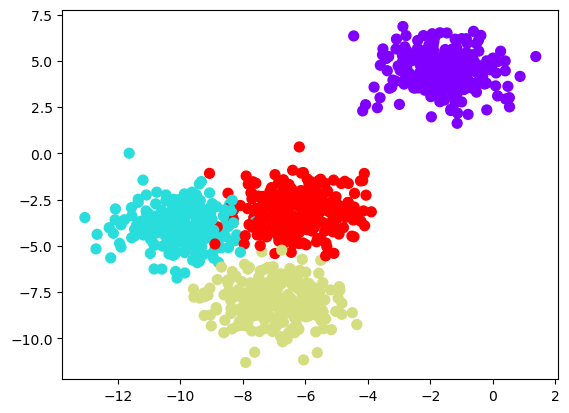

In [21]:

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
# Generate isotropic Gaussian blobs for clustering.
# n_samples: The total number of points equally divided among clusters.
# n_features: The number of features for each sample.
# centers: The number of centers to generate, or the fixed center locations.
# cluster_std: The standard deviation of the clusters.
# shuffle: Shuffle the samples.
# random_state: Determines random number generation for dataset creation.
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.0, shuffle=True, random_state=1)
# split data into training and testing
X_train,X_test,y_train,  y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Plot the blobs.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(4, activation='linear'),
])
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(X_train,y_train, epochs=500, verbose=0)



25/25 - 0s - loss: 0.2992 - accuracy: 0.8675 - 16ms/epoch - 655us/step
Test Loss: 0.2991504967212677, Test Accuracy: 0.8675000071525574
1042/1042 [==============================] - 0s 205us/step


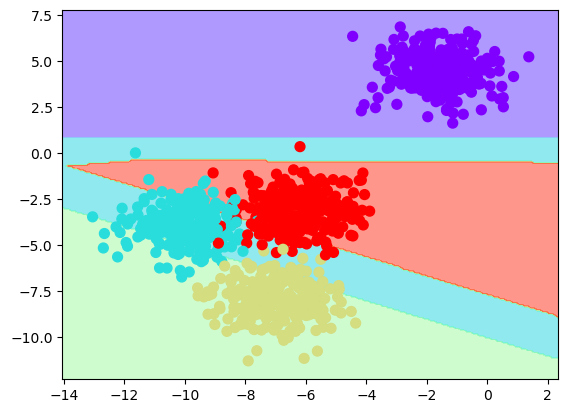

In [24]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

import numpy as np

# Plot the prediction boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generate a coordinate matrix.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each coordinate.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Get the class with the highest probability.
Z = np.argmax(Z, axis=1)

# Reshape the result.
Z = Z.reshape(xx.shape)

# Plot the contour.
plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.5)

# Plot the blobs.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

1042/1042 [==============================] - 0s 205us/step


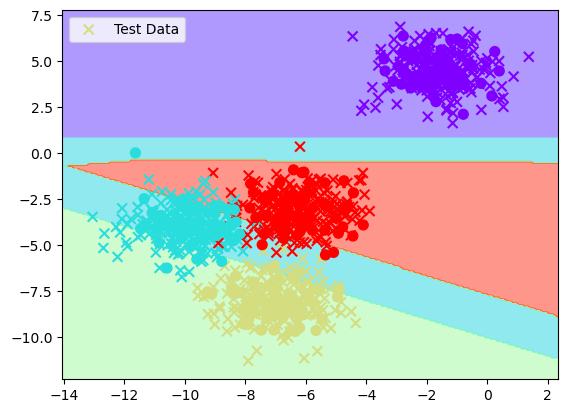

In [25]:
import numpy as np

# Plot the prediction boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generate a coordinate matrix.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each coordinate.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Get the class with the highest probability.
Z = np.argmax(Z, axis=1)

# Reshape the result.
Z = Z.reshape(xx.shape)

# Plot the contour.
plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.5)

# Plot the test dataset points.
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='rainbow', marker='x', label='Test Data')
plt.legend(loc='upper left')

# Plot the training dataset points (optional).
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow', marker='o', label='Training Data')

plt.show()
